In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 01. Introduction to Machine Learning
### From raw data to predictive models
* What is machine learning?;
* The scientific method;
* Basic principles: supervised and unsupervised learning, reinforcement learning;
* Preparing data;
* Preview of the entire process.

In [3]:
print("The kernel is working...")

The kernel is working...


### The Scientific Method Steps
* Ask a question
* Do a research
* Form a hypothesis
* Test the hypothesis with an experiment
    * Experiment works -> Analyze the data
    * Experiment doesn't work -> Fix experiment
* Results align with hypothesis -> OK
* Results don't align with hypothesis -> new question, new hypothesis
* Communicate the results
<img src="pics/sm.png">

### OSEMN Model
* Some guidelines on the process to extract meaningful information from data
    * Very similar to the scientific method
    * Can be viewed as a sequential process
        * Or just as some guidelines on how to do research
    * Reads as "awesome"

1. **O**btain data
2. **S**crub data
3. **E**xplore data
4. **M**odel data
5. i**N**terpret the results

Data Ingestion / Data Wrangling / Data Mungning

We need to work on problem data, so Tesla cars do not hit people with black skin.

The model depends on the data, and the data describes the model. There is a really strong bond between them.

### Applied Machine Learning Process
* This allows us to do our job faster and more reliably
1. Problem definition
    * Make sure the problem is well-defined and that you're solving the right problem
2. Data analysis
    * Get familiar with the available data
3. Data preparation
    * Get the data ready for modelling
4. Algorithm evaluation
    * Test and compare algorithms
5. Result improvement
    * Use results to create better models (e.g. fine-tuning, ensembles)
6. Result presentation
    * Describe the problem and solution to non-specialists

## Machine Learning
### Fundamental concepts

* We described a general process
    * We didn't explain ML in detail
* *"A computer program is said to learn from experience $ E $ with respect to some task $ T $ and some performance measure $ P $, if its performance on $ T $, as measured by $ P $, improves with experience $ E $."* - Tom Mitchell, Carnegie Mellon University
* More simply, **making computers learn from data**
    * And observing them getting better and better
    * Results: *computers do things that they weren't explicitly told*
* The field is vast (and expanding)
    * There are many sub-fields, variations and algorithms
    * ... but the basis is still the same

Each algorithm has pre-conditions and post-conditions. In programming, we have steps we could follow and it will reproduce the results. But in ML, the algorithms are just placeholders. They mean nothing all by themselves, but when we provide them with some data, they start working. Take a Linear regression for example. All by itself, it means nothing, but when we give the algorithm some data, it produces the model.

If we take ourselves as an example. Our performance metric $ P(t=0) > 0 $ is our current condition (we know nothing about ML), and our expected performance metric due 03.12.2023 is $ P(t=3/12) >> P(t=0) $

**The process is iterative. It does not happen suddenly.**

*"In the standart algorithms we say what needs to be done, but here we just say (declare) what do we want."*

Some cool websites with articles full of ideas:
* [`Papers With Code`](https://paperswithcode.com)
* [`Arxiv`](https://arxiv.org)

### Types of Machine Learning Algorithms
* **Supervised learning** (we know the data and what do we want, and the algorithm has to resemble the results)
    * We train the program on previously known (labelled) data
    * After training, we expect it to make predictions on new data
    * Examples: regression, classification
* **Unsupervised learning** (we have data and a hypothesis and we just let the algorithm generate the result. *we do not have a way to check if the results are correct*)
    * We leave the program to find patterns in data
    * Examples: clustering analysis, dimensionality reduction
* **Reinforcement learning** (Actuve learning. Each action changes the setting. The result changes what the algorithm could do)
    * A form of unsupervised learning
    * The program learns continuously
    * Examples: learning to play a game by observing other players, learning to drive a car

### Algorithms by Task
* **Statistical algorithms**
* **Regression** - predicting a continuous variable
* **Classification** - predicting class labels
* **Clustering** - finding compact groups of data points
* **Dimensionality reduction** - simplifying the input data
* **Recommendation** - suggest items for users
* **Optimization** - minimize / maximize a target function
* **Testing and improvement algorithms** - helper algorithms to select, fine-tune and optimize other ML algorithms
* ... and more :)

Semantic segmentation is better than object detection (pixel by pixel)

### ML demo

[`Spaceship Titanic Data`](https://www.kaggle.com/competitions/spaceship-titanic/data)

In [4]:
passenger_data = pd.read_csv("datasets/train.csv", true_values = ["True"], false_values = ["False"])

In [5]:
passenger_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [6]:
passenger_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [7]:
passenger_data.PassengerId.sample(50)

2167    2313_01
6295    6664_01
6854    7249_01
2561    2748_01
6942    7366_01
116     0122_01
4567    4866_01
2279    2449_02
2249    2409_02
2341    2521_01
6631    6992_03
3234    3476_03
1823    1950_01
477     0513_01
6459    6816_06
3213    3459_01
5262    5614_01
4487    4774_02
868     0930_02
787     0825_01
5117    5466_04
130     0140_01
1322    1401_01
7794    8319_01
1253    1326_01
3852    4128_02
2471    2649_01
6174    6517_01
239     0257_01
1898    2028_01
1115    1182_02
1005    1075_01
3968    4233_01
5635    5990_01
4658    4965_01
8074    8634_01
1167    1233_01
1672    1771_01
4585    4887_01
1417    1500_02
528     0564_02
4011    4272_01
2313    2492_01
1403    1479_01
5390    5756_06
3532    3787_03
2160    2309_01
974     1033_01
6918    7336_02
7526    8050_01
Name: PassengerId, dtype: object

In [8]:
passenger_data.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [9]:
passenger_data.HomePlanet.value_counts(dropna = False)

Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: HomePlanet, dtype: int64

In [10]:
passenger_data[passenger_data.HomePlanet.isna()] # none != none

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,True
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,True
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,False
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,9084_01,NaN,False,E/582/P,TRAPPIST-1e,25.0,False,1258.0,0.0,22.0,19.0,0.0,Jurs Mone,False
8613,9194_01,NaN,False,E/603/S,55 Cancri e,53.0,False,0.0,4017.0,0.0,13.0,3147.0,NaN,False
8666,9248_01,NaN,False,F/1792/S,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,Gian Perle,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False


In [11]:
passenger_data.HomePlanet.astype("category")

0       Europa
1        Earth
2       Europa
3       Europa
4        Earth
         ...  
8688    Europa
8689     Earth
8690     Earth
8691    Europa
8692    Europa
Name: HomePlanet, Length: 8693, dtype: category
Categories (3, object): ['Earth', 'Europa', 'Mars']

In [12]:
passenger_data.HomePlanet.value_counts(dropna = False)

Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: HomePlanet, dtype: int64

In [13]:
passenger_data.CryoSleep.value_counts(dropna = False)

False    5439
True     3037
NaN       217
Name: CryoSleep, dtype: int64

In [14]:
destinations = passenger_data.Destination.value_counts().sort_values(ascending=True)

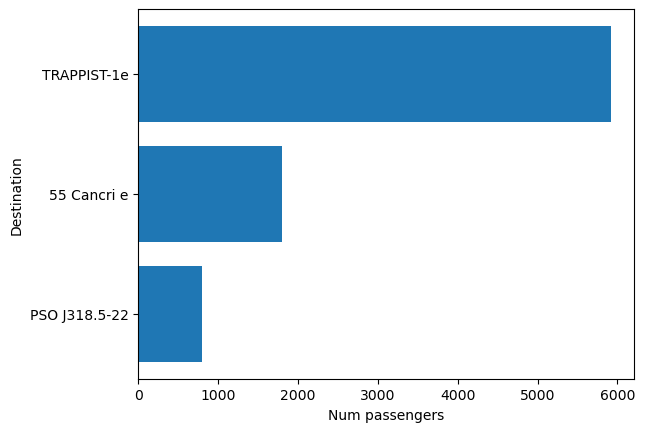

In [15]:
plt.barh(destinations.index, destinations)

plt.xlabel("Num passengers")
plt.ylabel("Destination")

plt.show()

### 80% of the work is working with data. The other 80% are Machine Learning...

In [16]:
num_passengers = passenger_data.PassengerId \
    .str.split("_", expand = True)[0] \
    .value_counts().value_counts() \
#    .sort_values(ascending = True)

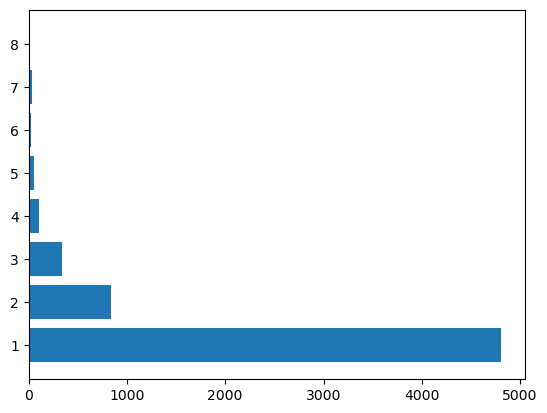

In [17]:
plt.barh(num_passengers.index, num_passengers)
plt.show()

In [18]:
passenger_data.Transported.value_counts(dropna = False)

True     4378
False    4315
Name: Transported, dtype: int64

In [19]:
model = LogisticRegression()

In [20]:
#model.fit(passenger_data)

Do not start working with models from the beggining. Take your time cleaning and sorting the data.

In [21]:
# passenger_attributes = passenger_attributes.dropna()

In [22]:
passenger_attributes = passenger_data.drop(columns = ["Transported"]) # X
passenger_labels = passenger_data.Transported # y

There is a process:
<img src="pics/prc.png" />

In [23]:
passenger_attributes.drop(columns = ["PassengerId", "Name", "Cabin"])

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0


In [24]:
# model.fit(passenger_attributes, passenger_labels) Everything should be a number...

In [25]:
passenger_attributes = passenger_attributes.drop(columns = ["PassengerId", "Name", "Cabin"])

In [26]:
passenger_attributes = pd.get_dummies(passenger_attributes, drop_first = True)

In [27]:
len(passenger_attributes.dropna()) / len(passenger_attributes)

0.876567353042678

In [28]:
passenger_attributes = passenger_attributes.dropna()

#### This is called one-hot encoding

In [29]:
#pd.get_dummies(passenger_attributes["HomePlanet"], drop_first = True)

In [30]:
# model.fit(passenger_attributes, passenger_labels) We have NaNs, so we should preprocess the data

In [31]:
len(passenger_attributes.dropna()) / len(passenger_attributes) # We do not have NaNs anymore :D

1.0

* p - passengers
* n - NaN
$$ \frac{p - n}{p} = real$$

- We pay a price if we want to be sloppy - Less accurate model

In [32]:
passenger_labels = passenger_labels[passenger_attributes.index]

In [33]:
len(passenger_attributes), len(passenger_labels)

(7620, 7620)

In [34]:
model.fit(passenger_attributes, passenger_labels)

/home/deyan/Documents/Anaconda/ENTER/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
model.score(passenger_attributes, passenger_labels)

0.7896325459317586

In [36]:
test_passenger_data = pd.read_csv("datasets/test.csv")

In [37]:
test_passenger_attributes = test_passenger_data

test_passenger_attributes = test_passenger_attributes.drop(columns = ["PassengerId", "Name", "Cabin"])
test_passenger_attributes = pd.get_dummies(test_passenger_attributes, drop_first = True)
test_passenger_attributes = test_passenger_attributes.dropna()

In [38]:
test_passenger_attributes

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,27.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0
1,19.0,0.0,9.0,0.0,2823.0,0.0,0,0,0,0,1,0
2,31.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0
3,38.0,0.0,6652.0,0.0,181.0,585.0,1,0,0,0,1,0
4,20.0,10.0,0.0,635.0,0.0,0.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4270,43.0,47.0,0.0,3851.0,0.0,0.0,0,1,0,0,1,0
4271,40.0,0.0,865.0,0.0,3.0,0.0,0,0,0,0,1,0
4272,34.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0
4273,42.0,0.0,847.0,17.0,10.0,144.0,0,0,0,0,1,0


In [39]:
model.predict(passenger_attributes)

array([ True, False, False, ...,  True, False,  True])

In [40]:
print(classification_report(passenger_labels, model.predict(passenger_attributes)))

              precision    recall  f1-score   support

       False       0.79      0.78      0.79      3789
        True       0.79      0.80      0.79      3831

    accuracy                           0.79      7620
   macro avg       0.79      0.79      0.79      7620
weighted avg       0.79      0.79      0.79      7620



In [41]:
model.coef_

array([[-1.06465134e-03, -1.38935261e-03,  5.69742070e-04,
         5.88896487e-04, -1.87240037e-03, -1.69122291e-03,
         1.66903407e+00,  5.08021611e-01,  1.35762104e+00,
        -3.37715768e-01, -6.18376931e-01, -1.45087581e-02]])

In [42]:
list(zip(passenger_attributes.columns.tolist(), model.coef_[0,:].tolist()))

[('Age', -0.0010646513437106305),
 ('RoomService', -0.001389352607213862),
 ('FoodCourt', 0.0005697420697245112),
 ('ShoppingMall', 0.0005888964872037101),
 ('Spa', -0.0018724003722863662),
 ('VRDeck', -0.0016912229122633305),
 ('HomePlanet_Europa', 1.6690340668040198),
 ('HomePlanet_Mars', 0.5080216114962107),
 ('CryoSleep_True', 1.3576210434675433),
 ('Destination_PSO J318.5-22', -0.33771576809453874),
 ('Destination_TRAPPIST-1e', -0.6183769307908101),
 ('VIP_True', -0.014508758086481879)]

The most important thing for us is to know the questions we are asking. The right question guides us to the right answer.

Date: 07.09.2023